<a href="https://colab.research.google.com/github/KravtsovaAlyona/data_science_platform/blob/main/%D0%9A%D1%80%D0%B0%D0%B2%D1%86%D0%BE%D0%B2%D0%B0_6_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ФИО:** Кравцова А.Е

**Почта:** KravtsovaAE@mgpu.ru

#  K-Means Clustering


Реализовать K-Means на наборе данных пингвинов.

1. Примените K-Means к набору данных `пингвины`.
2. Постройте набор данных с метками кластеров. Похожи ли они на основную картину, полученную при графическом анализе?
3. Рассчитайте однородность, полноту и оценку v_measure. Насколько близко сходится кластеризация?

Используйте следующие числовые атрибуты:
```
bill_length_mm
bill_depth_mm
flipper_length_mm
body_mass_g
```

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


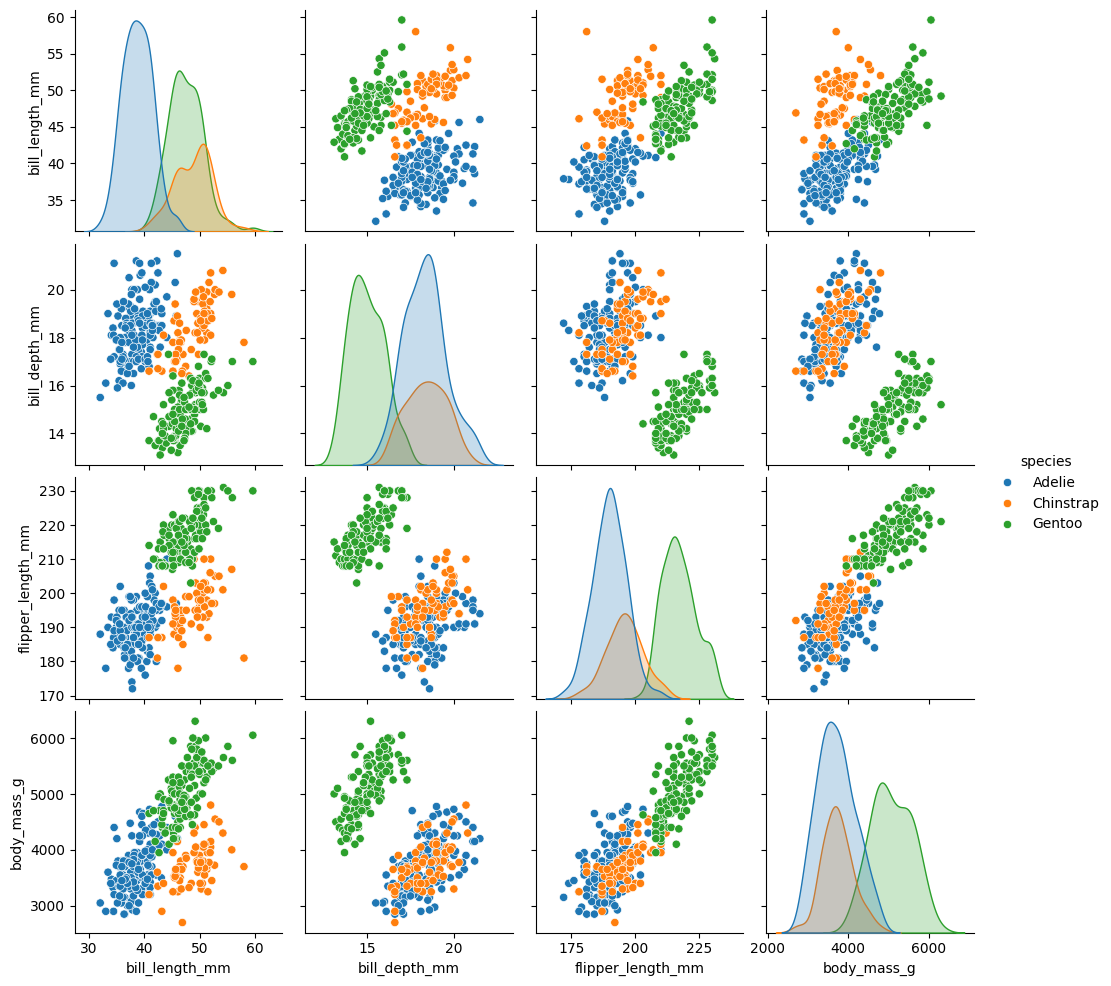

In [1]:
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import silhouette_samples, silhouette_score, homogeneity_score, completeness_score, v_measure_score

penguins = sns.load_dataset("penguins")

sns.pairplot(data=penguins, hue="species")
penguins = penguins.dropna()
penguins.head()

In [3]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


В рассматриваемом датасете присутсвуют категориальные переменные, которые не пригодятся для кластеризации в соответсвии с заданием. Поэтому создам датасет X только с числовыми атрибутами

In [35]:
attributes = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
X= penguins[attributes]
X.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


#Задание 1
Примените K-means к набору данных penguins

##K-means для пары длина клюва - длина плавника

Расмотрю пару значений **длина клюва - длина плавника**.

Перед кластеризацией необходимо провести силуэтный анализ с целью определния *k*


In [56]:
X1=penguins[['bill_length_mm', 'flipper_length_mm']]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[0.6117940477662408, 0.4795175256517374, 0.4456965052903638, 0.42458714020898125, 0.41073010144406985]


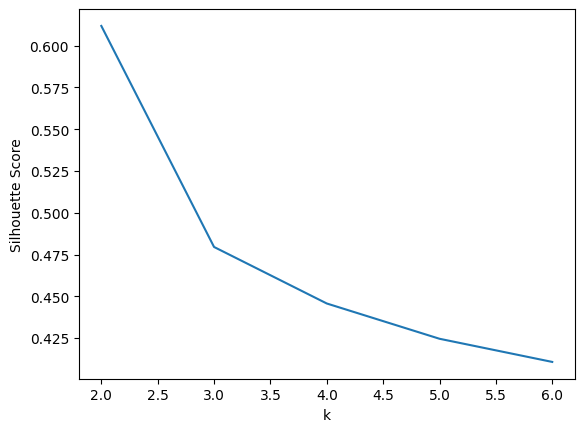

In [57]:
range_n_clusters = [2, 3, 4, 5, 6]
silhouette_avg = []

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X1)
    silhouette_avg.append(silhouette_score(X1, cluster_labels))

print(silhouette_avg)
plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.show()

Из графика следует, что опитимально установить k=2, так как при таком значении наибольшее расстояние между точками кластера

---



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-79-a2e6c5f4c25b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1['cluster'] = bill_flipper.labels_


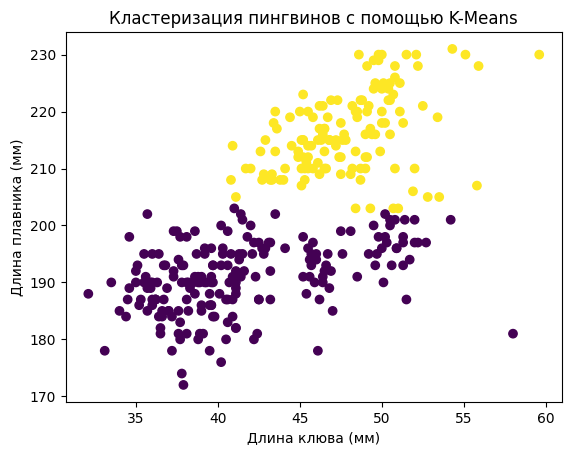

In [79]:
bill_flipper = KMeans(n_clusters=2)
bill_flipper.fit(X1)
X1['cluster'] = bill_flipper.labels_

plt.scatter(X1['bill_length_mm'], X1['flipper_length_mm'], c=X1['cluster'])
plt.xlabel('Длина клюва (мм)')
plt.ylabel('Длина плавника (мм)')
plt.title('Кластеризация пингвинов с помощью K-Means')
plt.show()


##K-means для пары масса тела - длина плавника

Далее рассмотрю пару **вес тела - длина плавника** также с применением силуэтного анализа

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[0.6308383674975124, 0.5754421972601953, 0.5532130416310284, 0.5367905644024444, 0.5209739528602894]


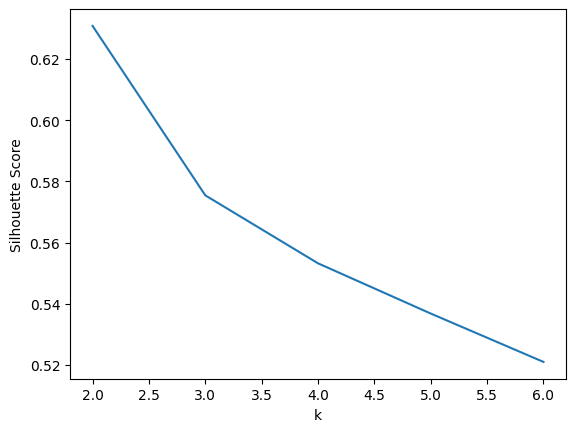

In [62]:
#выбираю нужные столбцы
X2=penguins[['body_mass_g', 'flipper_length_mm']]

#силуэтный анализ
range_n_clusters = [2, 3, 4, 5, 6]
silhouette_avg = []

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X2)
    silhouette_avg.append(silhouette_score(X2, cluster_labels))

print(silhouette_avg)
plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.show()

Силуэтный анализ показ, что оптимально выбрать k=2, так как при таком значении наибольшее расстояние между точками кластера

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-80-e7c0c6c48900>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X2['cluster'] = body_flipper.labels_


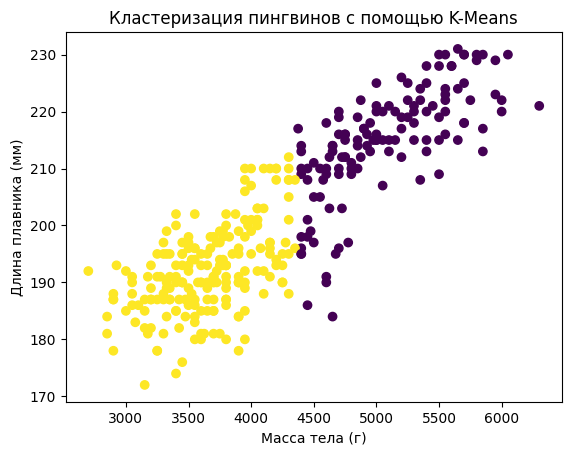

In [80]:
body_flipper = KMeans(n_clusters=2)
body_flipper.fit(X2)
X2['cluster'] = body_flipper.labels_

plt.scatter(X2['body_mass_g'], X2['flipper_length_mm'], c=X2['cluster'])
plt.xlabel('Масса тела (г)')
plt.ylabel('Длина плавника (мм)')
plt.title('Кластеризация пингвинов с помощью K-Means')
plt.show()


##K-means для всего набора данных

**Силуэтный анализ**

Перед кластеризацией необходимо определить количество k. Воспользуюсь силуэтным анализом, который сравнивает расстояние между точками в одном кластере и точками в соседних кластерах

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[0.6307117469850305, 0.57518504839574, 0.5526805568849732, 0.5360915311456262, 0.5196614520125821]


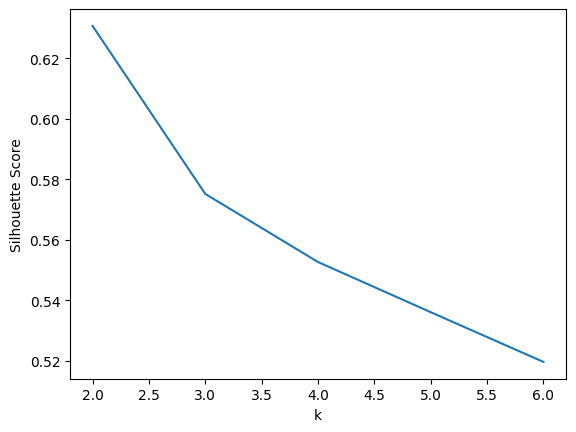

In [38]:
range_n_clusters = [2, 3, 4, 5, 6]
silhouette_avg = []

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg.append(silhouette_score(X, cluster_labels))

print(silhouette_avg)
plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.show()

Итак, оптимально выбрать k=2, так как при таком значении наибольшее расстояние между точками кластера

In [60]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
X['cluster'] = kmeans.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-60-0bd37ebb79fd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster'] = kmeans.labels_


#Упражнение 2
Постройте набор данных с метками кластеров. Похожи ли они на основную картину, полученную при графическом анализе?

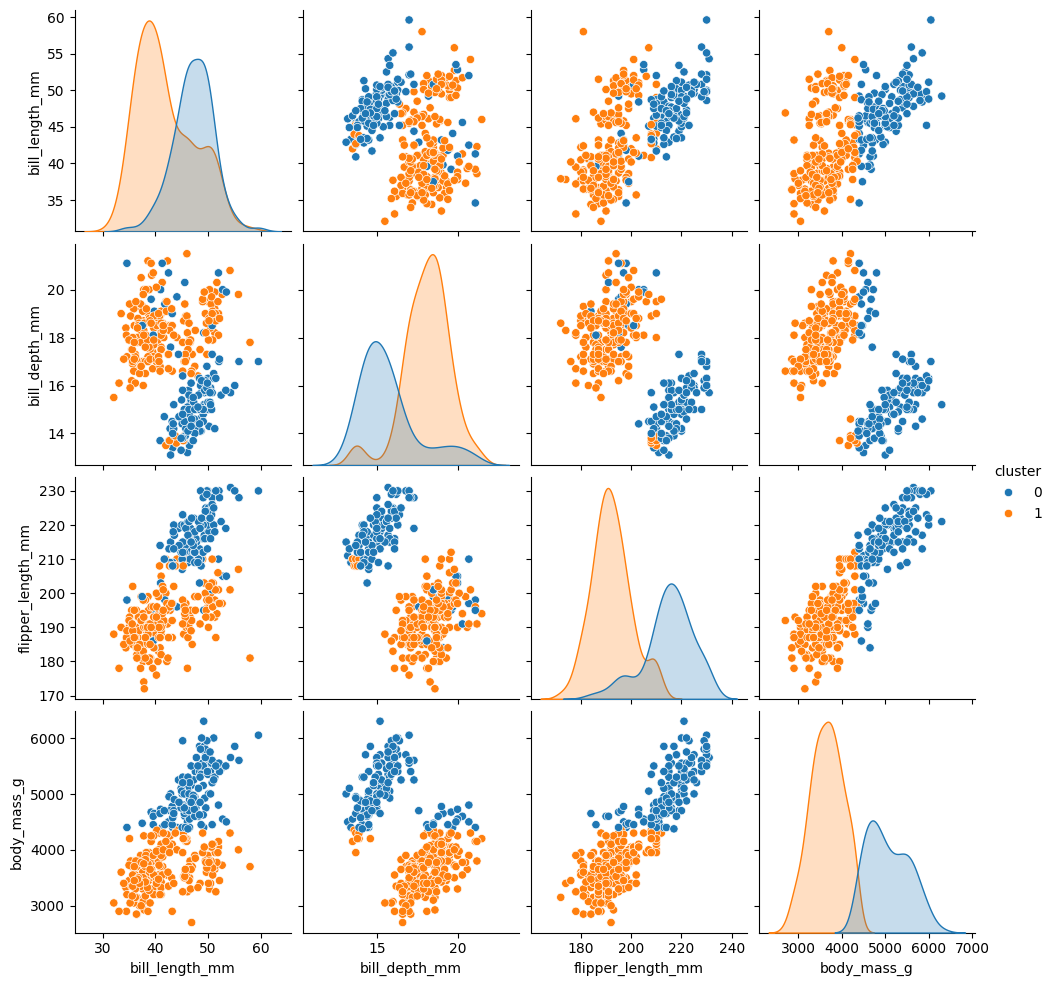

In [43]:
sns.pairplot(data=X, hue="cluster")
plt.show()

Так как силуэтный анализ показал, что оптимально рассматривать 2 кластера, то получившиеся диаграммы содержат в себе меньше пересечений и совпадений в отличие от первоначальной

#Упражнение 3
Рассчитайте однородность, полноту и оценку v_measure. Насколько близко сходится кластеризация?

*Памятка из лекции:*



*   homogeneity_score: метрика однородности разметки кластера с учетом исходных данных. Результат кластеризации удовлетворяет однородности, если все его кластеры содержат только точки данных, которые являются членами одного класса. Плохая однородность обычно означает, что у нас недостаточная кластеризация, т. е.  k  слишком мала.
*   completeness_score: результат кластеризации удовлетворяет полноте, если все точки данных, являющиеся членами данного класса, являются элементы одного и того же кластера. Плохая полнота обычно означает чрезмерную кластеризацию, т. е.  k  слишком велика.
*   v_measure_score: V-мера — это гармоническое среднее между однородностью и полнотой: v=2∗(однородность∗полнота)/(однородность+полнота)









##Метрики по всем параметрам

In [51]:
labels = kmeans.labels_
homogeneity = metrics.homogeneity_score(penguins['species'], labels)
completeness = metrics.completeness_score(penguins['species'], labels)
v_measure = metrics.v_measure_score(penguins['species'], labels)
print(f"Однородность: {homogeneity}")
print(f"Полнота: {completeness}")
print(f"V-мера: {v_measure}")

Однородность: 0.36891098026278196
Полнота: 0.5810838007864318
V-мера: 0.45130394153573883


Метрики модели, кластеризирующей сразу все числовые параметры, довольно низкие. Данные кластеров но до конца правильно распределены и соотнесены. 45% v-меры говорит о неточности и несблансированности модели

##Метрики по параметрам длина клюва-длина плавника

In [74]:
homogeneity = metrics.homogeneity_score(penguins['species'], X1['cluster'])
completeness = metrics.completeness_score(penguins['species'], X1['cluster'])
v_measure = metrics.v_measure_score(penguins['species'], X1['cluster'])
print(f"Однородность: {homogeneity}")
print(f"Полнота: {completeness}")
print(f"V-мера: {v_measure}")

Однородность: 0.5110599085353231
Полнота: 0.8003865835074452
V-мера: 0.6238081334497558


Итак, показатели по параметрам длина клюва-длина плавника выше показателей по остальным моделям. По этим признакам действительно можно выделить два весомых кластера. Полнота в 80% указывает на то, что практически все точки расположены в своем кластере. v-мера говорит об эффективности алгоритма, в общем и целом, эффективность невелика. Но если сравнивать с другими моделями в лаборатнорной работе, то значение удолетворительное

##Метрики по  параметрам масса тела - длина плавника

In [81]:
homogeneity = metrics.homogeneity_score(penguins['species'], X2['cluster'])
completeness = metrics.completeness_score(penguins['species'], X2['cluster'])
v_measure = metrics.v_measure_score(penguins['species'], X2['cluster'])
print(f"Однородность: {homogeneity}")
print(f"Полнота: {completeness}")
print(f"V-мера: {v_measure}")

Однородность: 0.3689109802627819
Полнота: 0.5810838007864318
V-мера: 0.4513039415357387


Показатели этих парметров не очень хорошие, низкая однородность свидетельствует о том что кластер состоит из объектов разных кластеров. Модель также несблансирована по полноте и одноородности

Подводя итог, кластеризация методом K-means неэффективна для предложенного набора данных,  рассмотренные метрики свидетельствуют о неточности моделей